In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
products = pd.read_csv('/datasets/products.csv', sep=';')

In [4]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [5]:
aisles = pd.read_csv('/datasets/aisles.csv',sep=';')

In [6]:
order_products = pd.read_csv('/datasets/order_products.csv',sep=';')

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
print(orders.info())
print()
print(orders.duplicated().sum())

#I used .info() to get information on my dataset duplicated to see how many entries I had knowing that i wouldnt be able 
#to see everything. I then did a sum of the duplicates to see the total number i had.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wed_orders = (orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)

print(wed_orders)
print()
print(wed_orders.sum())



0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool

121


In [9]:
# Remove duplicate orders

print(orders.info())

print()

orders = orders.drop_duplicates()
print(orders)
print()
print(orders.info())

# Ran orders.info so i could see how many entires i had to start. I then did drop duplicates and then ran .info again knowing from before i only had 15 duplicates to be dropped. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724           

In [10]:
# Double check for duplicate rows
print(orders.duplicated().sum())

# ran duplicated and sum to confirm i had no more duplicates. 

0


In [11]:
# Double check for duplicate order IDs only
print(orders['order_id'].duplicated().sum())

#Called duplicated and sum on just the order_id column


0


### `products` data frame

In [12]:
# Check for fully duplicate rows
print(products.duplicated().sum())


0


In [13]:
# Check for just duplicate product IDs
print(products.info())
print()
print(products['product_id'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

0


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
print(products['product_name'].duplicated().sum())

1361


In [15]:
# Check for duplicate product names that aren't missing
no_miss_dup = products[~(products['product_name'].isna()) & (products['product_name'].str.lower().duplicated())]

print(no_miss_dup)
print()
print(no_miss_dup.duplicated().sum())

# Made a variable that holds the df with no missing product names. After doing this i ran duplicated and sum to confirm there were no duplicates. 

       product_id                                     product_name  aisle_id  \
2058         2059                                  biotin 1000 mcg        47   
5455         5456                 green tea with ginseng and honey        96   
5558         5559                           cream of mushroom soup        69   
7558         7559                        cinnamon rolls with icing       105   
9037         9038                           american cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
2058            

### `departments` data frame

In [16]:
print(departments)

    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


In [17]:
print(departments.duplicated().sum())

0


### `aisles` data frame

In [18]:
print(aisles.info())
print()
print(aisles.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

    aisle_id                       aisle
0          1       prepared soups salads
1          2           specialty cheeses
2          3         energy granola bars
3          4               instant foods
4          5  marinades meat preparation
5          6                       other
6          7               packaged meat
7          8             bakery desserts
8          9                 pasta sauce
9         10            kitchen supplies
10        11            cold flu allergy
11        12                 fresh pasta
12        13              prepared meals
13        14      tofu meat alternatives
14        15            packaged seafood


In [19]:
print(aisles.duplicated().sum())

0


### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
print(order_products.info())
print()
print(order_products.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None

0


In [21]:
# Double check for any other tricky duplicates
print(order_products[order_products.duplicated(subset=['order_id', 'product_id'])])



Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


## Find and remove missing values


### `products` data frame

In [22]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [23]:
# Are all of the missing product names associated with aisle ID 100?
print(products['product_name'].isna().sum())
products_missing_name_100 = products[(products['product_name'].isna()) & (products['aisle_id'] == 100)]
print()
print(products_missing_name_100)

1258

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


It looks like all of the missing names in the product_name column are associated with aisle_id 100. I determined this by first getting a sum of how many missing values I had in the product name category. I found it was 1258. After running some logic the resulting dataframe had 1258 entires also. This confirms the missing product names are associated with aisle 100.

In [24]:
# Are all of the missing product names associated with department ID 21?
products_missing_name_d21 = products[(products['product_name'].isna()) & (products['department_id'] == 21)]
print(products_missing_name_d21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [25]:
# What is this ailse and department?
only_100_21 = products_missing_name_100 & products_missing_name_d21
print(only_100_21.head())
print()
products_aisle_dept = pd.merge(
    only_100_21,
    aisles,
    on='aisle_id',
    how='left'
)

products_aisle_dept = pd.merge(
    products_aisle_dept,
    departments,
    on='department_id',
    how='left'
)

print(products_aisle_dept.head())

     product_id  product_name  aisle_id  department_id
37           38         False       100             21
71           72         False       100             21
109         110         False       100             21
296         297         False       100             21
416         417         False       100             21

   product_id  product_name  aisle_id  department_id    aisle department
0          38         False       100             21  missing    missing
1          72         False       100             21  missing    missing
2         110         False       100             21  missing    missing
3         297         False       100             21  missing    missing
4         417         False       100             21  missing    missing


After merging the products df with the aisles df due to them both having matching department ids, i then combined that new dataframe with the departments df on the department id because again they matched. 
After doing this you find that the aisle 100 and department 21 are both labeled 'missing'

In [26]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products['product_name'][37])

#printed a value that i knew from previous was NaN and is now Unknown

Unknown


### `orders` data frame

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [28]:
# Are there any missing values where it's not a customer's first order?
value = (orders['days_since_prior_order'].isna()) & (orders['order_number'] > 1)
print(value.sum())

if value.sum() == 0 :
    print('No')
else :
    print('yes') 
    
    

0
No


### `order_products` data frame

In [29]:
print(order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [30]:
# What are the min and max values in this column?
print(order_products.min())
print()
print(order_products.max())

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
print(order_products.isna().sum())

nan_add_to_cart_order = order_products[order_products['add_to_cart_order'].isna()]
print(nan_add_to_cart_order)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# Do all orders with missing values have more than 64 products?
print(order_products['order_id'].value_counts().loc[9310])
# Identify orders with at least one missing 'add_to_cart_order'
missing_orders = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print()
# Filter the dataframe to include only rows of orders with missing 'add_to_cart_order'
missing_orders_df = order_products[order_products['order_id'].isin(missing_orders)]
print(missing_orders_df.head(15))
print()
# Group by 'order_id' and count the number of products (rows) in each order
product_counts = missing_orders_df.groupby('order_id').size()
print(product_counts)
# Check if all orders have more than 64 products
more_than_64_products = product_counts > 64
print()
# Print the result
all_more_than_64 = more_than_64_products.all()
print("Do all orders with missing values have more than 64 products?", all_more_than_64)

65

       order_id  product_id  add_to_cart_order  reordered
267     2094761       31469               57.0          1
737     2449164        5068                NaN          0
1742    2997021        4920               37.0          0
3463     871281       40063               61.0          1
3535     171934       36397                7.0          0
4350       9310       44422               11.0          1
6768    2729254       13176               61.0          0
6878     180546        8021               58.0          1
7307     903110       47766               14.0          1
8649     678116        1365                9.0          1
9926    1968313       43867                NaN          0
9934     903110       24390               15.0          1
10355   1673227       38312               10.0          1
11333   2999801       21376               47.0          1
13027    180546       26454               63.0          0

order_id
9310        65
61355      127
102236      95
129627      6

In [33]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999')
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int64')
print(order_products['add_to_cart_order'].dtype)
print(order_products['add_to_cart_order'].isna().sum())
print(order_products[737:739])

int64
0
     order_id  product_id  add_to_cart_order  reordered
737   2449164        5068                999          0
738   1405788       18027                  2          1


### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
if (orders['order_hour_of_day'].min() >= 0) and (orders['order_hour_of_day'].max() <= 23):
    print('Times are sensible')
else:
    print('Times are not sensible')

Times are sensible


In [35]:
if (orders['order_dow'].min() >=0) and (orders['order_dow'].max() <= 6) :
    print('Days are sensible')
else:
    print('Days are not sensible')

Days are sensible


###  What time of day do people shop for groceries?

In [36]:
grouped_orders = orders['order_hour_of_day'].value_counts()
print(grouped_orders)
print()
# Compute the value counts and store them in a separate DataFrame
grouped_orders = orders['order_hour_of_day'].value_counts().sort_index().reset_index()
grouped_orders.columns = ['order_hour_of_day', 'num_orders']
#grouped_orders = 'group'



10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_hour_of_day, dtype: int64



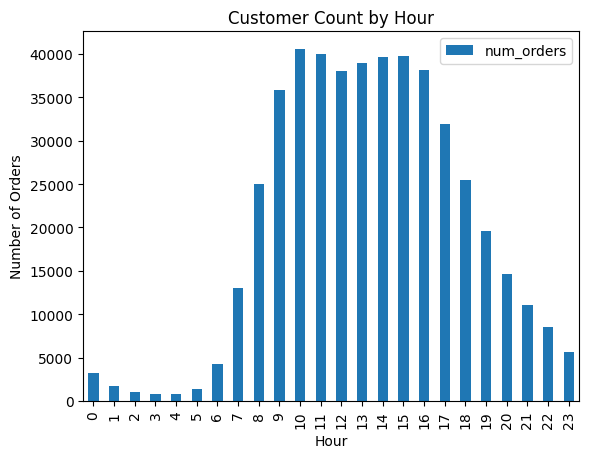

In [37]:
grouped_orders.plot(
    title='Customer Count by Hour',
    x='order_hour_of_day',
    y='num_orders',
    kind='bar',
    xlabel='Hour',
    ylabel='Number of Orders'
)
plt.show()

###  What day of the week do people shop for groceries?

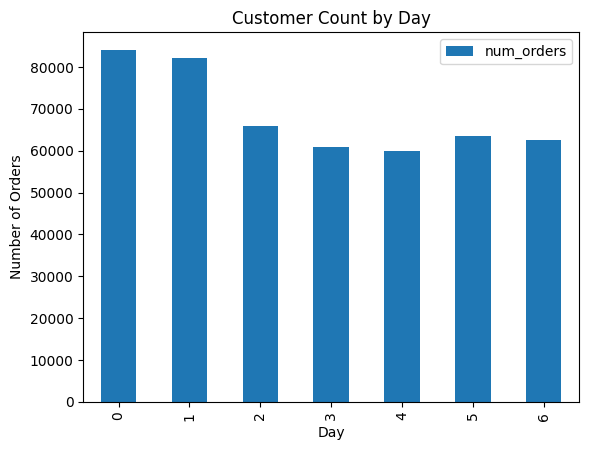

In [38]:
grouped_orders_day = orders['order_dow'].value_counts().sort_index().reset_index()
grouped_orders_day.columns = ['order_dow', 'num_orders']
grouped_orders_day.plot(
    title='Customer Count by Day',
    x='order_dow',
    y='num_orders',
    kind='bar',
    xlabel='Day',
    ylabel='Number of Orders'
)
plt.show()

People shop for groceries the most on Day 0

### How long do people wait until placing another order?

In [39]:
days_wait = orders['days_since_prior_order'].value_counts().sort_index().reset_index()
print(days_wait)
print()
days_wait_sorted = days_wait.sort_values(by='days_since_prior_order')
#days_wait_sorted = 
print(days_wait_sorted)
print()


    index  days_since_prior_order
0     0.0                    9589
1     1.0                   20179
2     2.0                   27138
3     3.0                   30224
4     4.0                   31006
5     5.0                   30096
6     6.0                   33930
7     7.0                   44577
8     8.0                   25361
9     9.0                   16753
10   10.0                   13309
11   11.0                   11467
12   12.0                   10658
13   13.0                   11737
14   14.0                   13992
15   15.0                    9416
16   16.0                    6587
17   17.0                    5498
18   18.0                    4971
19   19.0                    4939
20   20.0                    5302
21   21.0                    6448
22   22.0                    4514
23   23.0                    3337
24   24.0                    3015
25   25.0                    2711
26   26.0                    2640
27   27.0                    2986
28   28.0     

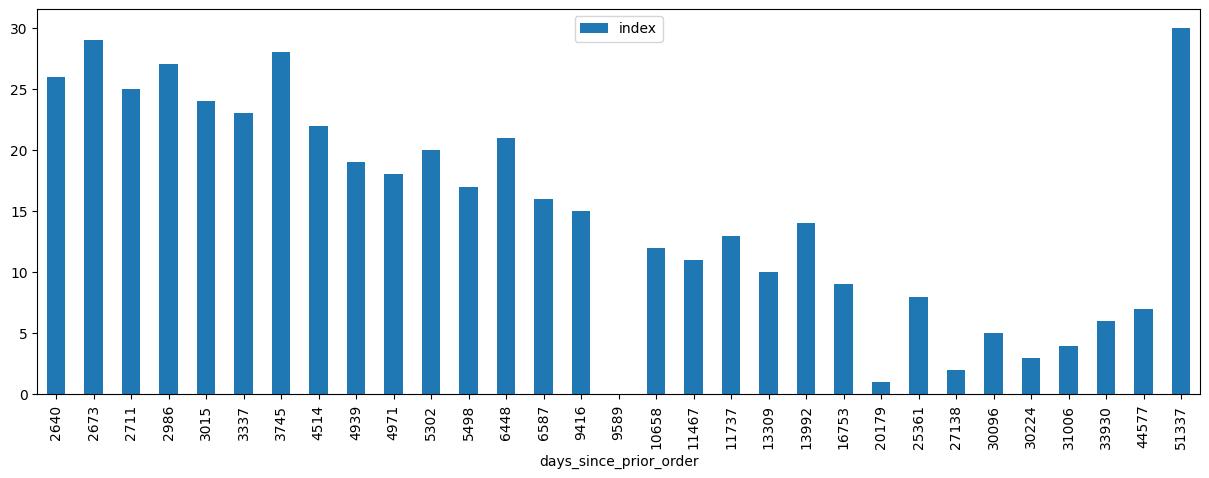

In [40]:
days_wait_sorted.plot(kind="bar", x= 'days_since_prior_order', y='index', figsize=[15, 5])
plt.show()

### Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [41]:
wednesdays = orders[orders['order_dow'] == 3]

In [42]:
saturdays = orders[orders['order_dow'] == 6]

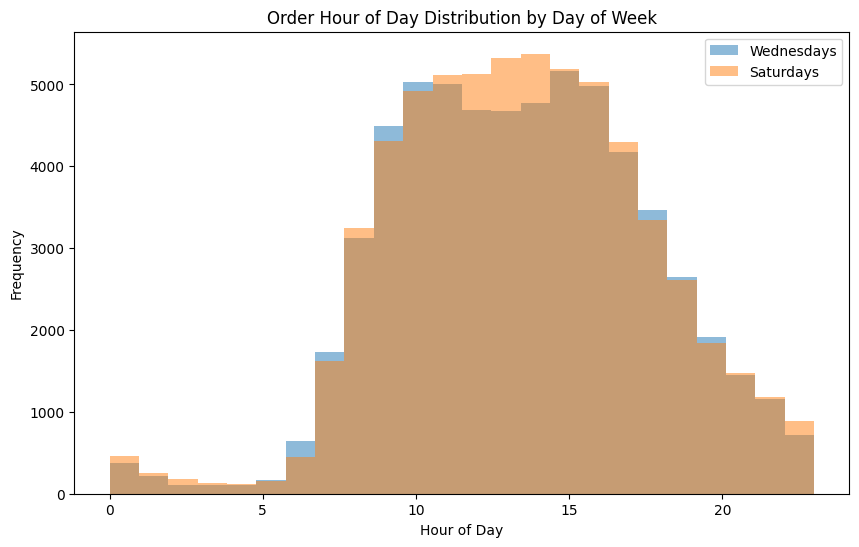

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(wednesdays['order_hour_of_day'], bins=24, alpha=0.5, label='Wednesdays')
plt.hist(saturdays['order_hour_of_day'], bins=24, alpha=0.5, label='Saturdays')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Order Hour of Day Distribution by Day of Week')
plt.legend()
plt.show()

It looks like the most active time for both wednesday and saturday.Saturday from about 12 to 3pm seems to be the busiest times overall.

### What's the distribution for the number of orders per customer?

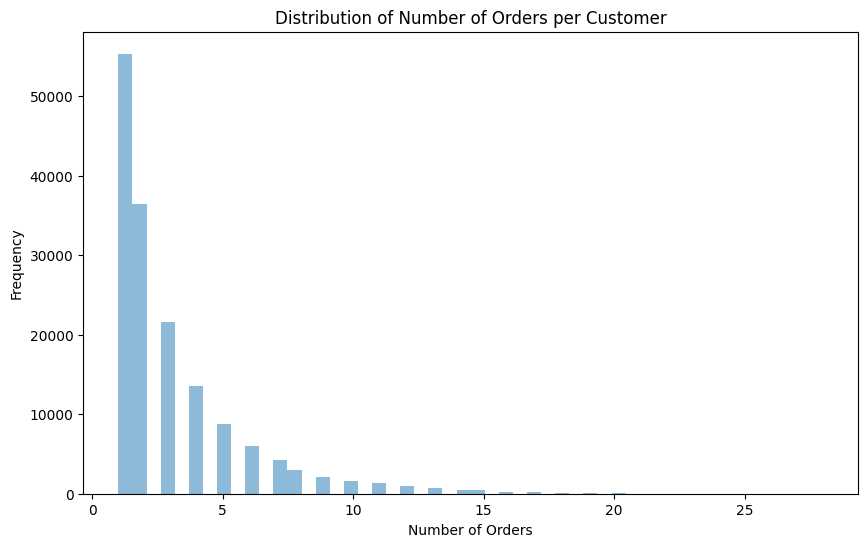

In [44]:
# Group the data by customer_id and count the number of orders
order_counts = orders.groupby('user_id').size().reset_index(name='order_count')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(order_counts['order_count'], bins=50, alpha=0.5)
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Orders per Customer')
plt.show()

###  What are the top 20 popular products (display their id and name)?

In [45]:
merged_order_products = pd.merge(order_products, products, on='product_id')

product_orders = merged_order_products.groupby(['product_id', 'product_name']).size().reset_index(name='order_count')


product_orders = product_orders.sort_values('order_count', ascending=False)
product_orders


,product_id,product_name,order_count
22808,24852,banana,66050
12025,13176,bag of organic bananas,53297
19370,21137,organic strawberries,37039
20077,21903,organic baby spinach,33971
43271,47209,organic hass avocado,29773
...,...,...,...
5339,5836,arctic d cod liver oil lemon,1
39932,43573,whisk- 10 inch,1
39930,43570,queso cotija,1
33181,36174,whole pinto beans,1


In [46]:
top_20_products = product_orders.head(20)
print(top_20_products)

       product_id              product_name  order_count
22808       24852                    banana        66050
12025       13176    bag of organic bananas        53297
19370       21137      organic strawberries        37039
20077       21903      organic baby spinach        33971
43271       47209      organic hass avocado        29773
43788       47766           organic avocado        24689
43663       47626               large lemon        21495
15364       16797              strawberries        20018
24047       26209                     limes        19690
25556       27845        organic whole milk        19600
25666       27966       organic raspberries        19197
21025       22935      organic yellow onion        15898
22908       24964            organic garlic        15292
41244       45007          organic zucchini        14584
35996       39275       organic blueberries        13879
45561       49683            cucumber kirby        13675
25889       28204        organi

In [47]:

print(top_20_products[['product_id', 'product_name', 'order_count']])

       product_id              product_name  order_count
22808       24852                    banana        66050
12025       13176    bag of organic bananas        53297
19370       21137      organic strawberries        37039
20077       21903      organic baby spinach        33971
43271       47209      organic hass avocado        29773
43788       47766           organic avocado        24689
43663       47626               large lemon        21495
15364       16797              strawberries        20018
24047       26209                     limes        19690
25556       27845        organic whole milk        19600
25666       27966       organic raspberries        19197
21025       22935      organic yellow onion        15898
22908       24964            organic garlic        15292
41244       45007          organic zucchini        14584
35996       39275       organic blueberries        13879
45561       49683            cucumber kirby        13675
25889       28204        organi

### How many items do people typically buy in one order? What does the distribution look like?

In [48]:
order_sizes = order_products.groupby('order_id')['product_id'].count().reset_index(name='num_items')
print(order_sizes)

        order_id  num_items
0              4         13
1              9         15
2             11          5
3             19          3
4             20          8
...          ...        ...
450041   3421034         17
450042   3421053          9
450043   3421071          5
450044   3421077          4
450045   3421079          1

[450046 rows x 2 columns]


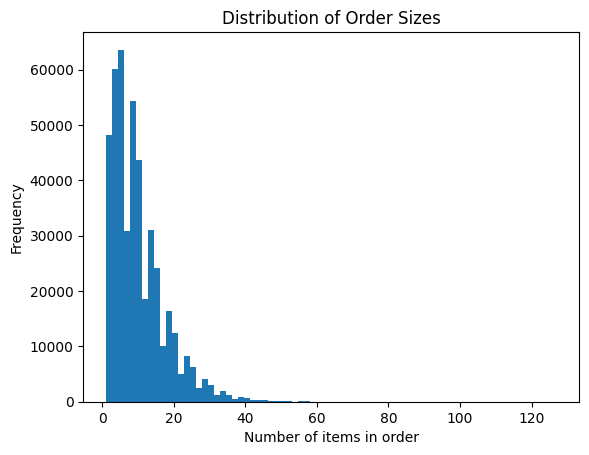

In [49]:
plt.hist(order_sizes['num_items'], bins=75)
plt.xlabel("Number of items in order")
plt.ylabel("Frequency")
plt.title("Distribution of Order Sizes")
plt.show()

###  What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
merged_reorder_products = pd.merge(order_products, products, on='product_id')

product_reorders = merged_order_products.groupby(['product_id', 'product_name', 'reordered']).size().reset_index(name='order_count')

product_reorders = product_reorders.sort_values('reordered', ascending=False)
product_reorders

,product_id,product_name,reordered,order_count
79991,49694,burrito- steak & cheese,1,3
31423,19555,three seed sourdough home bake bread,1,1
62789,39019,reduced sodium fat free chicken broth,1,10
31427,19557,jamaican jerk seasoning,1,1
31429,19558,raw honey,1,21
...,...,...,...,...
34463,21437,steak & burger seasoning,0,2
34465,21442,cracked black pepper turkey breast,0,4
34468,21444,mountain breeze with bleach cleanser,0,1
34469,21445,spicy italian uncured sausage,0,20


In [51]:
print(product_reorders.head(20))

       product_id                                     product_name  reordered  \
79991       49694                          burrito- steak & cheese          1   
31423       19555             three seed sourdough home bake bread          1   
62789       39019            reduced sodium fat free chicken broth          1   
31427       19557                          jamaican jerk seasoning          1   
31429       19558                                        raw honey          1   
31431       19559                 rosemary truffle gourmet popcorn          1   
62786       39017                            unscented 3 in 1 soap          1   
31433       19560    2chic avocado & olive oil shampoo travel size          1   
31435       19561                     raw organic green super food          1   
62784       39016             organic thai red curry sprouted rice          1   
31437       19562           double cream chive vegan cashew cheese          1   
62782       39015           

In [52]:
top_20_reorder = product_reorders.head(20)

print(top_20_reorder[['product_id', 'product_name', 'reordered']])


       product_id                                     product_name  reordered
79991       49694                          burrito- steak & cheese          1
31423       19555             three seed sourdough home bake bread          1
62789       39019            reduced sodium fat free chicken broth          1
31427       19557                          jamaican jerk seasoning          1
31429       19558                                        raw honey          1
31431       19559                 rosemary truffle gourmet popcorn          1
62786       39017                            unscented 3 in 1 soap          1
31433       19560    2chic avocado & olive oil shampoo travel size          1
31435       19561                     raw organic green super food          1
62784       39016             organic thai red curry sprouted rice          1
31437       19562           double cream chive vegan cashew cheese          1
62782       39015                original snack size french twis

In [53]:

# Filter order_products to only include rows with reordered = 1
order_products_reordered = order_products[order_products['reordered'] == 1]

# Group by product_id and count any column
product_reorder_counts = order_products_reordered.groupby('product_id').size().reset_index(name='reorder_count')

# Merge with products to get product names
product_reorder_counts = product_reorder_counts.merge(products, on='product_id')

# Display the result
print(product_reorder_counts.head(20))

    product_id  reorder_count  \
0            1            158   
1            3             31   
2            4             25   
3            7              1   
4            8              6   
5            9             16   
6           10            151   
7           11             10   
8           12             16   
9           13              1   
10          18              8   
11          22              3   
12          23             56   
13          25            199   
14          26             35   
15          27              9   
16          28             60   
17          29             12   
18          30              2   
19          31              2   

                                         product_name  aisle_id  department_id  
0                          chocolate sandwich cookies        61             19  
1                robust golden unsweetened oolong tea        94              7  
2   smart ones classic favorites mini rigatoni wit...        38

###  For each product, what proportion of its orders are reorders?

In [54]:

product_reorder_proportion = order_products.groupby('product_id')['reordered'].mean().reset_index(name='reorder_proportion')


In [55]:
result = pd.merge(product_reorder_proportion, products, on='product_id')

In [56]:
result = result[['product_id', 'product_name', 'reorder_proportion']]

print(result)

       product_id                                       product_name  \
0               1                         chocolate sandwich cookies   
1               2                                   all-seasons salt   
2               3               robust golden unsweetened oolong tea   
3               4  smart ones classic favorites mini rigatoni wit...   
4               7                     pure coconut water with orange   
...           ...                                                ...   
45568       49690                      high performance energy drink   
45569       49691                      original pancake & waffle mix   
45570       49692    organic instant oatmeal light maple brown sugar   
45571       49693                             spring water body wash   
45572       49694                            burrito- steak & cheese   

       reorder_proportion  
0                0.564286  
1                0.000000  
2                0.738095  
3                0.5102

###  For each customer, what proportion of their products ordered are reorders?

In [57]:
#group by order_id and product_id and counts the number of orders
customer_orders = merged_reorder_products.groupby(['order_id', 'product_id']).size().reset_index(name='order_count')
print(customer_orders.head(10))

# Calculate the total number of orders for each customer
customer_total_orders = customer_orders.groupby('order_id')['order_count'].sum().reset_index(name='total_orders')
print(customer_total_orders)

# customer_orders and customer_total_orders dataframes merged on order_id
merged_total_df = pd.merge(customer_orders, customer_total_orders, on='order_id')
print(merged_total_df.head(16))

# Calculated the proportion of reordered products for each customer
merged_total_df['reorder'] = (merged_total_df['order_count'] - 1) / merged_total_df['total_orders'] * 100

# Grouped by order_id and calculate the average reorder proportion
customer_reorder_proportion = merged_total_df.groupby('order_id')['reorder'].mean().reset_index(name='avg_reorder_proportion')

print(customer_reorder_proportion)

   order_id  product_id  order_count
0         4       10054            1
1         4       17616            1
2         4       21351            1
3         4       22598            1
4         4       25146            1
5         4       26434            1
6         4       27761            1
7         4       32645            1
8         4       34862            1
9         4       39758            1
        order_id  total_orders
0              4            13
1              9            15
2             11             5
3             19             3
4             20             8
...          ...           ...
450041   3421034            17
450042   3421053             9
450043   3421071             5
450044   3421077             4
450045   3421079             1

[450046 rows x 2 columns]
    order_id  product_id  order_count  total_orders
0          4       10054            1            13
1          4       17616            1            13
2          4       21351            1 

###  What are the top 20 items that people put in their carts first? 

In [58]:
# Filter the first item added to each cart (add_to_cart_order == 1)
first_items = order_products[order_products['add_to_cart_order'] == 1]
print(first_items)

# Group by product_id and count the number of times each product was the first item added
first_item_counts = first_items.groupby('product_id')['product_id'].count().reset_index(name='count')

# Merge with the products dataframe to get the product names
first_item_counts = pd.merge(first_item_counts, products, on='product_id')

# Sort by count in descending order and select the top 20
top_20_first_items = first_item_counts.sort_values('count', ascending=False).head(20)

# Rearrange the columns to get the desired output
top_20_first_items = top_20_first_items[['product_id', 'product_name', 'count']]



         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]


In [59]:
print(top_20_first_items)

       product_id                 product_name  count
13414       24852                       banana  15562
7127        13176       bag of organic bananas  11026
15028       27845           organic whole milk   4363
11384       21137         organic strawberries   3946
25439       47209         organic hass avocado   3390
11786       21903         organic baby spinach   3336
25732       47766              organic avocado   3044
10622       19660                 spring water   2336
9050        16797                 strawberries   2308
15102       27966          organic raspberries   2024
24024       44632   sparkling water grapefruit   1914
26519       49235          organic half & half   1797
25658       47626                  large lemon   1737
115           196                         soda   1733
20853       38689     organic reduced fat milk   1397
14158       26209                        limes   1370
6660        12341                hass avocados   1340
3153         5785  organic r